## Application Flow

Before proceeding with the algorithm, let’s first discuss the lifecycle of an unsupervises machine learning model. This diagram explains the creation of an unsupervised Machine Learning model from scratch and then taking the same model further with hyperparameter tuning to increase its accuracy, deciding the deployment strategies for that model and once deployed setting up the logging and monitoring frameworks to generate reports and dashboards based on the client requirements. 
A typical lifecycle diagram for an unsupervised machine learning model looks like:

<img src="unsupervised_ApplicationFlow.PNG" width= "300">

## Clustering

Let’s suppose we give a child different objects to group. How does a child make a group? The child may group over the colour, over the shape, over the hardness or softness of the objects etc. The basic idea here is that the child tries to find out similarities and dissimilarities between different objects and then tries to make a group of similar objects. This is called **clustering**, the method of identifying similar instances and keeping them together.
In Other words, clustering identifies homogeneous subgroups among the observations.


Clustering is an unsupervised approach which finds a structure/pattern in a collection of unlabeled data.
A cluster is a collection of objects which are “similar” amongst themselves and are “dissimilar” to the objects belonging to a different cluster.
For example:


<img src="https://summerofhpc.prace-ri.eu/wp-content/uploads/2013/07/k-means_ilustration.png">


In the figure above, we can easily identify 4 different clusters. The clustering criteria here is distance. Whichever points are near to each other are kept in the same cluster and the faraway points belong to a different cluster


#### The Goal of Clustering

The goal of clustering is to determine the intrinsic groups in unlabeled data. The question is: what constitutes a good cluster? It can be shown that there is no absolute “best” criterion for cluster validation. Consequently, it is the user who must supply the criterion for validating the cluster. For example, we might be interested in finding representatives of homogeneous instances for finding the  “natural clusters” and identifying their unknown properties ( like “natural” data types), for finding appropriate groupings or in finding unusual(which are different from all other data) data objects (outlier detection).


### Applications
The scikit-learn book describes the various applications of clustering as follows:

* __For customer segmentation:__ You can cluster your customers based on their purchases,their activity on your website, and so on. This is useful to understand who your customers are and what they need, so you can adapt your products and marketing campaigns to each segment. For example, this can be useful in recommender systems to suggest content that other users in the same cluster enjoyed.

* __For data analysis:__ When analyzing a new dataset, it is often useful to first discover clusters of similar instances, as it is often easier to analyze clusters separately.

* __As a dimensionality reduction technique:__ Once a dataset has been clustered, it is usually possible to measure each instance’s affinity with each cluster (affinity is any measure of how well an instance fits into a cluster). Each instance’s feature vector x can then be replaced with the vector of its cluster affinities. If there are k clusters, then this vector is k dimensional. This is typically much lower dimensional than the original feature vector, but it can preserve enough information for further processing.

* __For anomaly detection (also called outlier detection):__ Any instance that has a low affinity to all the clusters is likely to be an anomaly. For example, if you have clustered the users of your website based on their behavior, you can detect users with unusual behavior, such as an unusual number of requests per second, and so on. Anomaly detection is particularly useful in detecting defects in manufacturing, or for fraud detection.

* __For semi-supervised learning:__ If you only have a few labels, you could perform clustering and propagate the labels to all the instances in the same cluster. This can greatly increase the amount of labels available for a subsequent supervised learning algorithm, and thus improve its performance.
.
* __For search engines:__ For example, some search engines let you search for images that are similar to a reference image. To build such a system, you would first apply a clustering algorithm to all the images in your database: similar images would end up in the same cluster. Then when a user provides a reference image, all you need to do is to find this image’s cluster using the trained clustering model, and you can then simply return all the images from this cluster.

* __To segment an image:__ By clustering pixels according to their color, then replacing each pixel’s color with the mean color of its cluster, it is possible to reduce the number of different colors in the image considerably. This technique is used in many object detection and tracking systems, as it makes it easier to detect the contour of each object.


##### Main Requirements:
The primary requirements that should be met by a clustering algorithm are:
* It should be scalable
* It should be able to deal with attributes of different types;
* It should be able to discover arbitrary shape clusters;
* It should have an inbuilt ability to deal with noise and outliers;
* The clusters should not vary with the order of input records;
* It should be able to handle data of high dimensions.
* It should be easy to interpret and use.


##### Approaches for Clustering:
The clustering approaches can be broadly divided into two categories: _Agglomerative_ and _Divisive_.

**Agglomerative:** This approach first considers all the points as individual clusters and then finds out the similarity between two points, puts them into a cluster. Then it goes on finding similar points and clusters until there is only one cluster left i.e., all points belong to a big cluster. This is also called the bottom-up approach.

**Divisive:** It is opposite of the agglomerative approach. It first considers all the points to be part of one big cluster and in the subsequent steps tries to find out the points/ clusters which are least similar to each other and then breaks the bigger cluster into smaller ones. This continues until there are as many clusters as there are datapoints. This is also called the top-down approach.


### K-Means Clustering

It was proposed by Stuart Lloyd at the Bell Labs in 1957 as a technique for pulse-code modulation,
but it was only published outside of the company in 1982, in a paper titled
_“Least square quantization in PCM”._By then, in 1965, Edward W. Forgy had published
virtually the same algorithm, so K-Means is sometimes referred to as Lloyd-Forgy.


K-Means is a clustering approach in which the data is grouped into K distinct non-overlapping clusters based on their distances from the K centres. The value of **K** needs to be specified first and then the algorithm assigns the points to exactly one cluster.


##### Theory

The theory discussed above can be mathematically expressed as:
* Let C1, C2, Ck be the K clusters
* Then we can write: $C_1 U C_2 UC_3 U…UC_k $={1,2,3,…,n} i.e., each datapoint has been assigned to a cluster.
* Also, 
<img src='non_overlapping.PNG' width='300'>
This means that the clusters are non-overlapping.

* The idea behind the K-Means clustering approach is that the within-cluster variation amongst the point should be minimum. The within-cluster variance is denoted by: W(Ck).Hence, according to the statement above, we need to  minimize this variance for all the clusters. Mathematically it can be written as:
<img src='minimize_ck.PNG' width='300'>

* The next step  is to define the criterion for measuring the within-cluster variance. Generally, the criterion is the Euclidean distance between two data points.
<img src='wck_formula.PNG' width='300'>

* The above formula says that we are calculating the distances between all the point in a cluster, then we are repeating it for all the K clusters(That’s why two summation signs) and then we are dividing it by the number of observation in the clusters (Ck is the number of observations in the Kth cluster) to calculate the average.

So, ultimately our goal is to minimize:

<img src='final_ck.PNG' width='300'>

The following algorithm steps are used to solve this problem




#### Algorithm:
1. Randomly assign K centres.
2. Calculate the distance of all the points from all the K centres and allocate the points to cluster based on the shortest distance. The model’s _inertia_ is the mean squared distance between each instance and its closest centroid. The goal is to have a model with the lowes intertia.
3. Once all the points are assigned to clusters, recompute the centroids.
4. Repeat the steps 2 and 3 until the locations of the centroids stop changing and the cluster allocation of the points becomes constant.

#### Python Explanation:

In [5]:
# Doing the necessary imports
%pylab inline
from pylab import *
import random as pyrandom
from scipy.spatial.distance import cdist
matplotlib.rc("image",cmap="gray")
from collections import Counter

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Consider a collection of points that are sampled from three different densities,
in this case normal densities with the same covariances but different means.

In [6]:
data = r_[10*randn(1000,2)+array([70,30]),
          10*randn(1000,2)+array([10,10]),
          10*randn(1000,2)+array([50,80])]
data = data[pyrandom.sample(range(len(data)),len(data))]

Here is a scatterplot of this data.

We clearly see three _clusters_, corresponding to the three _mixture components_.
How can we recover these clusters?

This is the job of _clustering algorithms_.

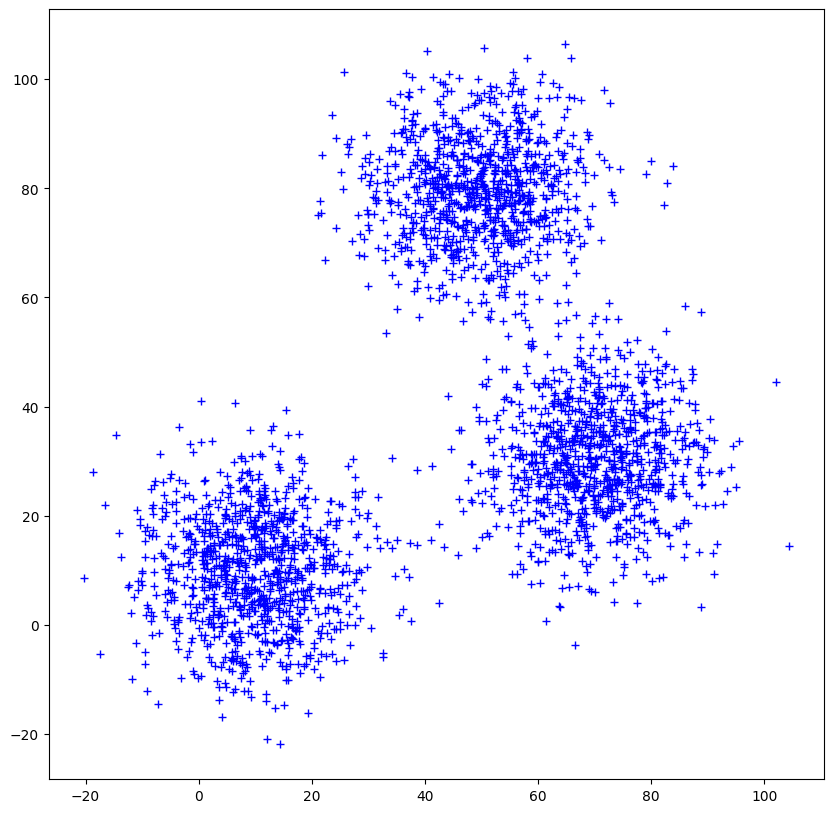

In [7]:
figsize(10,10)
plot(data[:,0],data[:,1],'b+')

Mixture densities arise in both unsupervised learning and in supervised learning.
In both cases, they commonly represent a problem structure in which data is
generated from a number of ideal prototypes (the cluster centres) but then
corrupted by noise.

- When each cluster has a distinct class label, we have a regular classification
problem with normal densities.

- When no cluster has any labels, we can hope to recover the underlying
clusters with a clustering algorithm and then assign labels to these clusters.
This is a form of _semi-supervised learning_.

- When there is training data with labels available, often each class is
a mixture of multiple clusters.  That is, each class is generated by multiple
prototypes (think characters in different fonts).

You can perform clustering either at the class level or across all samples and then label each cluster with its
corresponding class label.


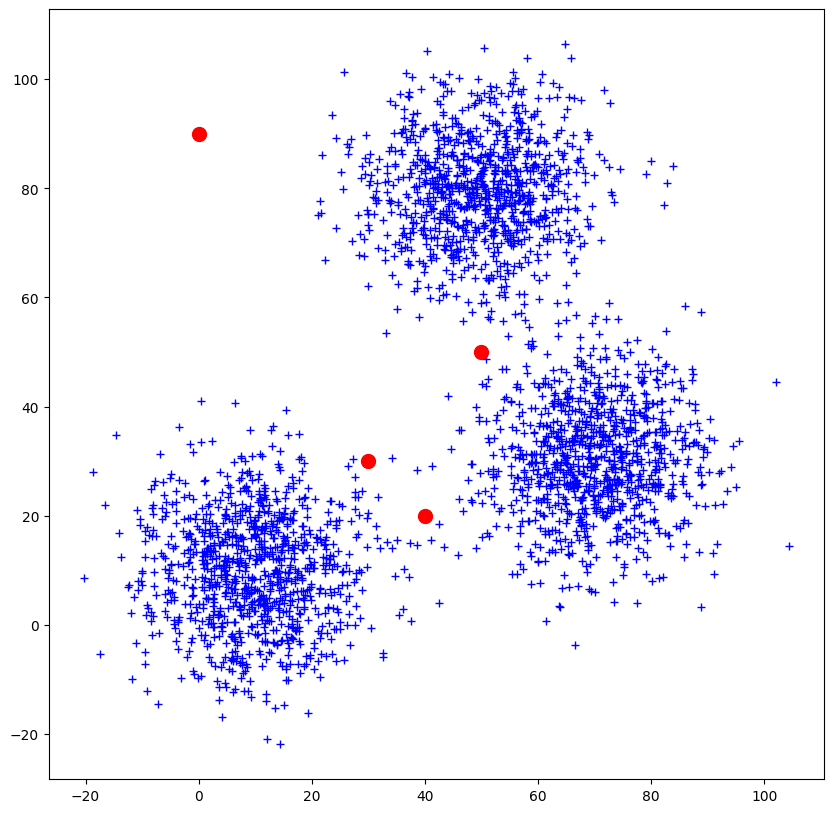

In [8]:
protos = array([[30,30],[40,20],[0,90],[50,50]]) # Initialize centroids
start = protos.copy()

figsize(10,10)
plot(data[:,0],data[:,1],'b+')
plot(protos[:,0],protos[:,1],'ro',markersize=10)

Obviously, those centers are wrong, but let's keep going.

Now, we compute the assignment of the data points to the prototypes
(array `closest`).
This is also wrong, but we're going to be using it anyay.

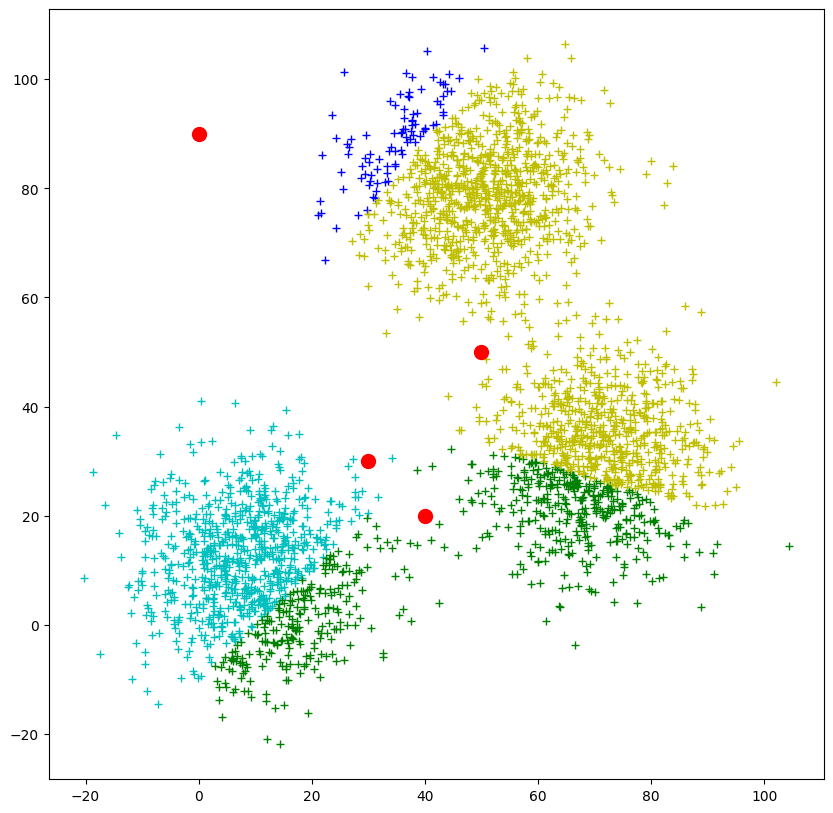

In [9]:
figsize(10,10)
dists = cdist(protos,data)
closest = argmin(dists,axis=0)
for i in range(len(protos)):
    plot(data[closest==i,0],data[closest==i,1],['c+','g+','b+','y+'][i])
plot(protos[:,0],protos[:,1],'ro',markersize=10)

In [10]:
history = [protos.copy()]

for i in range(len(protos)):
    protos[i,:] = average(data[closest==i],axis=0)
    
history.append(protos.copy())

Now we pretend that the cluster assignments are correct and
recompute the location of the centers.

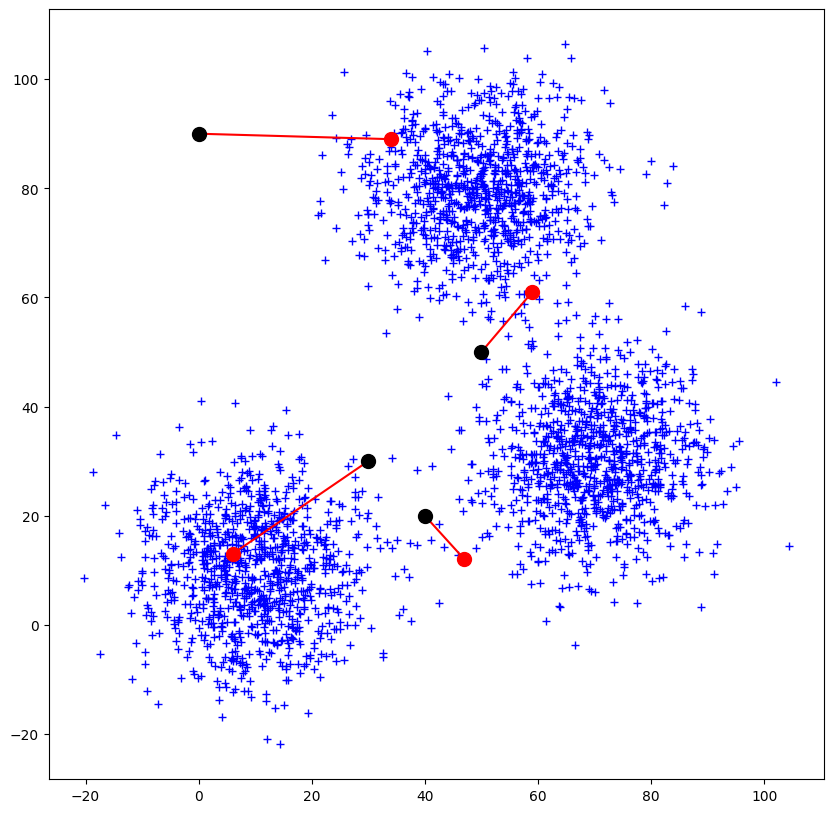

In [11]:
# Plotting the centroid movements
figsize(10,10)
plot(data[:,0],data[:,1],'b+')
harray = array(history)
for i in range(len(protos)):
    plot(harray[:,i,0],harray[:,i,1],'r')
plot(harray[0,:,0],harray[0,:,1],'ko',markersize=10)
plot(protos[:,0],protos[:,1],'ro',markersize=10)

As you can see, the centers have moved, and it looks like they have generally
moved in the right direction.

Now let's just repeat this process multiple times

In [12]:
for round in range(1000):
    if round%100==0: sys.stderr.write("%d "%round)
    dists = cdist(protos,data)
    closest = argmin(dists,axis=0)
    for i in range(len(protos)):
            protos[i,:] = average(data[closest==i],axis=0)
    history.append(protos.copy())

0 100 200 300 400 500 600 700 800 900 

We can now plot the path that the prototype guesses have taken.

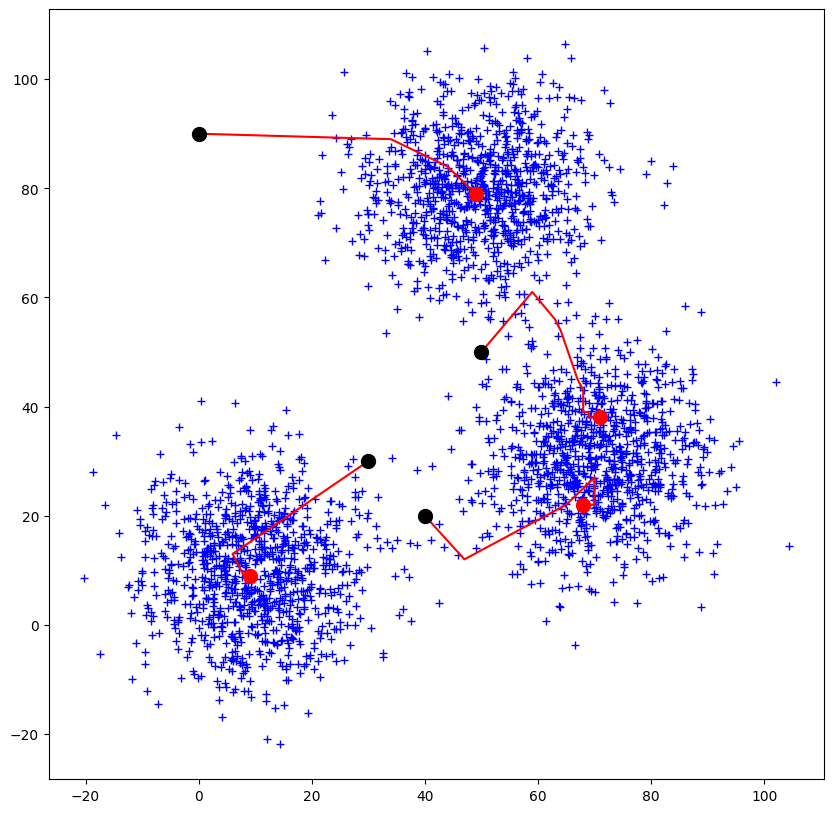

In [13]:
figsize(10,10)
plot(data[:,0],data[:,1],'b+')
history = array(history)
for i in range(len(protos)):
    plot(history[:,i,0],history[:,i,1],'r')
plot(history[0,:,0],history[0,:,1],'ko',markersize=10)
plot(protos[:,0],protos[:,1],'ro',markersize=10)

As you can see, the final location of the prototype centers (red) are nicely
in the center of the classes.
The algorithm doesn't give us exactly the cluster centers because there are
three clusters but we postulated four cluster centers.

We can also look at the partition of the data induced by these cluster centers.

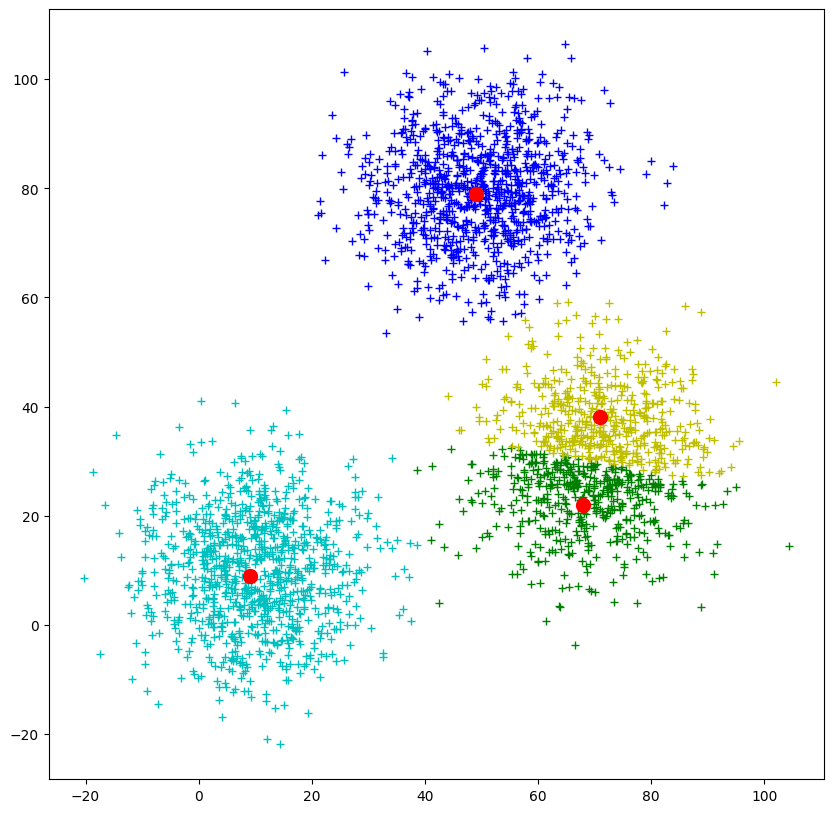

In [14]:
figsize(10,10)
dists = cdist(protos,data)
closest = argmin(dists,axis=0)
for i in range(len(protos)):
  plot(data[closest==i,0],data[closest==i,1],['c+','g+','b+','y+'][i])
plot(protos[:,0],protos[:,1],'ro',markersize=10)

The diagram above shows the step by step implementation of the K-Means algorithm.

As we saw earlier, we need to provide the value of K beforehand. But the question is how to get a good  value of K. An optimum value of K is obtained using the Elbow Method.

###### The Elbow-Method

This method is based on the relationship between the within-cluster sum of squared distances(WCSS Or Inertia) and the number of clusters. It is observed that first with an increase in the number of clusters WCSS decreases steeply and then after a certain number of clusters the drop in WCSS is not that prominent. The point after which the graph between WCSS and the number of clusters becomes comparatively smother is termed as the elbow and the number of cluster at that point are the optimum number of clusters as even after increasing the clusters after that point the variation is not decreasing by much i.e., we have accounted for almost all the dissimilarity in the data. An elbow-curve looks like:

<img src='elbow.PNG' width='500'>


##### An example with actual data

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
dataset=pd.read_csv('Mall_Customers.csv')

In [17]:
#dataset
X=dataset.iloc[:,3:]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


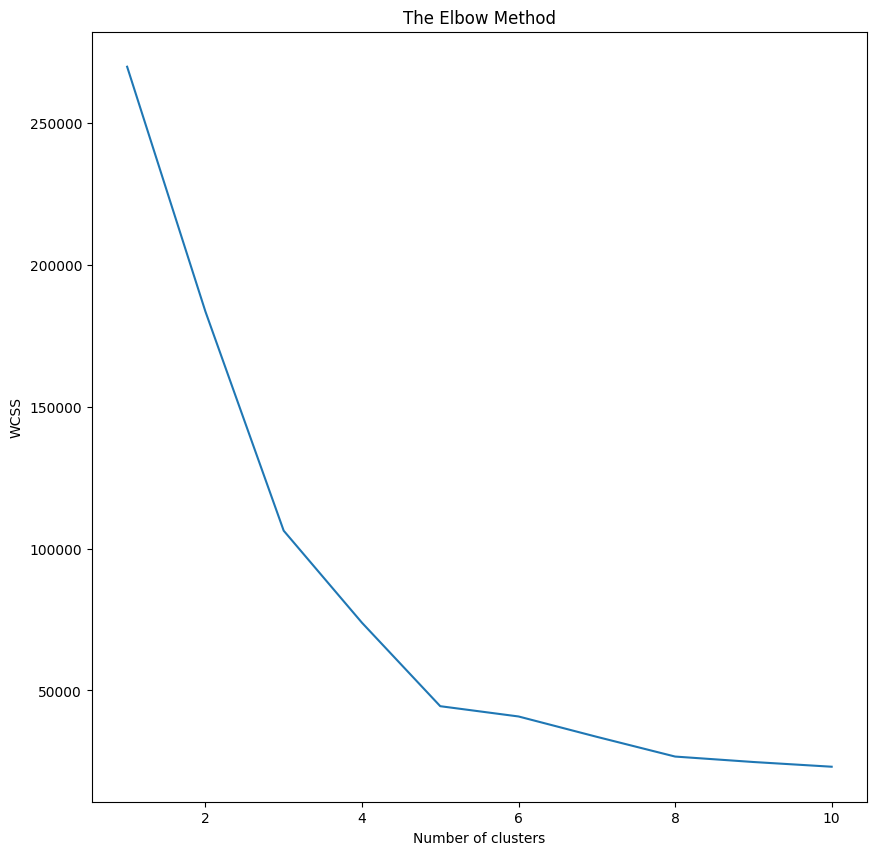

In [18]:
#elbow method
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [20]:
# It predicts the cluster number to which the datapoint belongs to
test=kmeans.predict(np.asarray([[3,3]]))
test[0]

c:\Users\hp\anaconda3\envs\aiml\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


np.int32(4)

In [21]:
# saving the model to the local file system
import pickle
filename = 'finalized_model.pickle'
pickle.dump(kmeans, open(filename, 'wb'))

In [22]:
# Looking at the points which belong to Cluster0
X[y_kmeans==0]

,Annual Income (k$),Spending Score (1-100)
43,39,61
46,40,55
47,40,47
48,40,42
49,40,42
...,...,...
121,67,40
122,69,58
126,71,35
132,72,34


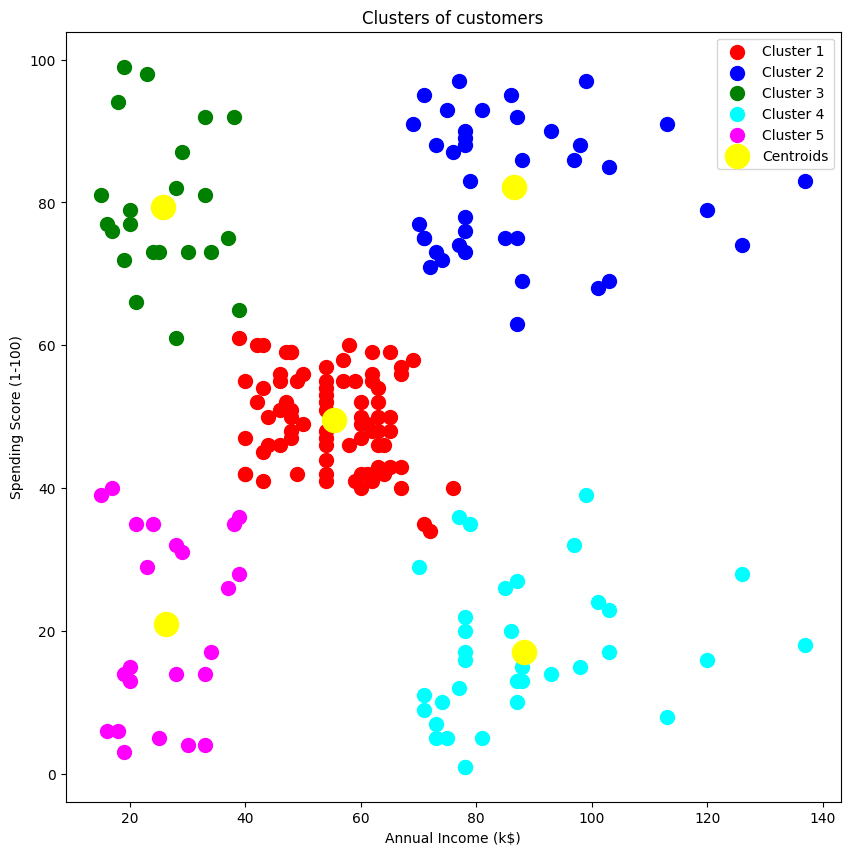

In [23]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0]['Annual Income (k$)'], X[y_kmeans == 0]['Spending Score (1-100)'], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1]['Annual Income (k$)'], X[y_kmeans == 1]['Spending Score (1-100)'], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2]['Annual Income (k$)'], X[y_kmeans == 2]['Spending Score (1-100)'], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3]['Annual Income (k$)'], X[y_kmeans == 3]['Spending Score (1-100)'], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4]['Annual Income (k$)'], X[y_kmeans == 4]['Spending Score (1-100)'], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

#### Custom Centroid Initialization

If you already know approximately where the centroids should be (e.g., if you ran
another clustering algorithm earlier), then you can set the init hyperparameter to a
NumPy array containing the list of centroids, and set n_init to 1:


In [24]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)

###### Challenges and improvements in K-Means:

1.	We need to specify the number of clusters beforehand.
2.	It is required to run the algorithm multiple times to avoid a sub-optimal solution
3.	K-Means does not behave very well when the clusters have varying sizes, different densities, or non-spherical shapes.
4.	The clusters sometimes vary based on the initial choice of the centroids. An important improvement to the K-Means algorithm, called **K-Means++**, was proposed in a _2006 paper by David Arthur and Sergei Vassilvitskii_. They introduced a smarter initialization step that tends to select centroids that are distant from one another, and this makes the K-Means algorithm much less likely to converge to a suboptimal solution.
5.	Another important improvement to the K-Means algorithm was proposed in a _2003 paper by Charles Elkan_.It considerably accelerates the algorithm by avoiding many unnecessary distance calculations: this is achieved by exploiting the _triangle inequality_ (i.e., the straight line is always the shortest; in a triangle with sides a,b and c=> **a+b>c**) and by keeping track of lower and upper bounds for distances between instances and centroids. 
6.	Yet another important variant of the K-Means algorithm was proposed in a _2010 paper by David Sculley_. Instead of using the full dataset at each iteration, the algorithm is capable of using **mini-batches**, moving the centroids just slightly at each iteration. This speeds up the algorithm typically by a factor of 3 or 4 and makes it possible to cluster huge datasets that do not fit in memory. Scikit-Learn implements this algorithm in the **MiniBatchKMeans** class. You can just use this class like the KMeans class:


### Hierarchical clustering

One main disadvantage of K-Means is that it needs us to pre-enter the number of clusters (K). Hierarchical clustering is an alternative approach which does not need us to give the value of K beforehand and also, it creates a beautiful tree-based structure for visualization.

Here, we are going to discuss the bottom-up (or Agglomerative) approach of cluster building.
We start by defining any sort of similarity between the datapoints. Generally, we consider the Euclidean distance. The points which are closer to each are more similar than the points which re farther away. The Algorithms starts with considering all points as separate clusters and then grouping pints together to form clusters.


**The Algorithm:**

1.	Begin with n observations and a measure (such as Euclidean distance) of all the n(n−1)/2 pairwise dissimilarities(or the Euclidean distances generally). Treat each observation as its own cluster. Initially, we have n clusters.
2.	Compare all the distances and put the two closest points/clusters in the same cluster. The dissimilarity(or the Euclidean distances) between these two clusters indicates the height in the dendrogram at which the fusion line should be placed.
3.	Compute the new pairwise inter-cluster dissimilarities(or the Euclidean distances) among the remaining clusters.
4.	Repeat steps 2 and 3 till we have only one cluster left.


**Code Example**

In [56]:
# Importing the necessary libraries
import random as pyrandom
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
# figsize(6,6)

In [57]:
#Defining a method to plot the clusters
ccolors = ['go', 'ro','bo','mo','co','yo']
def plotclusters(data,centers=None):
    xlim([0,100]); ylim([0,100])
    if centers is None:
        plot(data[:,0],data[:,1],'bo',markersize=5)
    else:
        for i in range(amax(centers)+1):
            plot(data[centers==i,0],data[centers==i,1],ccolors[i%len(ccolors)],markersize=5)

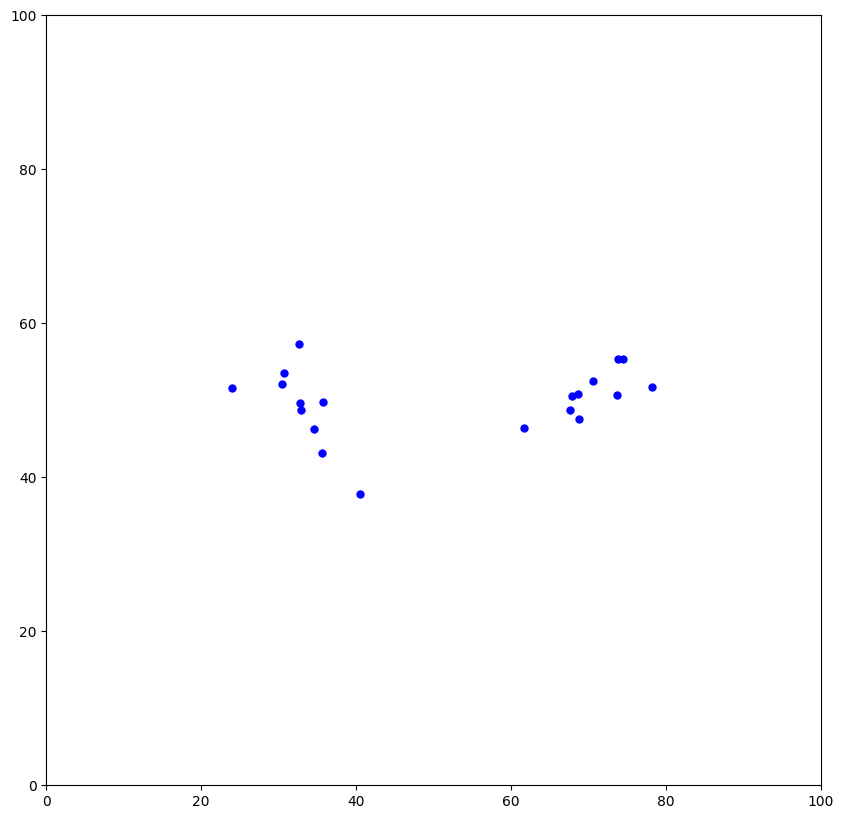

In [58]:
# A Simple Clustering Problem
data = r_[4*randn(10,2)+array([70,50]),
          4*randn(10,2)+array([30,50])]
# shuffle(data)
plotclusters(data)

The idea behind linkage clustering, or hierarchical clustering, is to put things that are close together into the same cluster. Linkage clustering is usually based on distances only.

In [59]:
# Compute distance between each pair of the two collections of inputs i.e., calculate distance between all the points in data
from scipy.spatial.distance import cdist
ds = cdist(data,data)

In [52]:
ds

array([[ 0.        , 43.79659121, 26.32289095, ..., 32.51312454,
        29.30153673, 32.76874587],
       [43.79659121,  0.        , 28.70606607, ..., 22.61066879,
        20.20056232, 22.34563599],
       [26.32289095, 28.70606607,  0.        , ...,  7.73602878,
         8.52739652,  8.06472055],
       ...,
       [32.51312454, 22.61066879,  7.73602878, ...,  0.        ,
         5.13594337,  0.3311346 ],
       [29.30153673, 20.20056232,  8.52739652, ...,  5.13594337,
         0.        ,  5.1620116 ],
       [32.76874587, 22.34563599,  8.06472055, ...,  0.3311346 ,
         5.1620116 ,  0.        ]], shape=(200, 200))

Based on pairwise distances, we can now compute a linkage matrix. We successively merge the closest points/clusters into the same cluster. The linkage "matrix" is simply a table listing which pairs of points are merged at what step and what distance.

In [60]:
from scipy.cluster.hierarchy import *
lm = linkage(ds,"single")
lm[:5]

C:\Users\hp\AppData\Local\Temp\ipykernel_30516\172699702.py:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  lm = linkage(ds,"single")


array([[ 7.        ,  8.        ,  2.54101981,  2.        ],
       [10.        , 16.        ,  2.62220112,  2.        ],
       [ 6.        ,  9.        ,  3.0574579 ,  2.        ],
       [12.        , 15.        ,  3.63627905,  2.        ],
       [ 5.        , 22.        ,  4.84706597,  3.        ]])

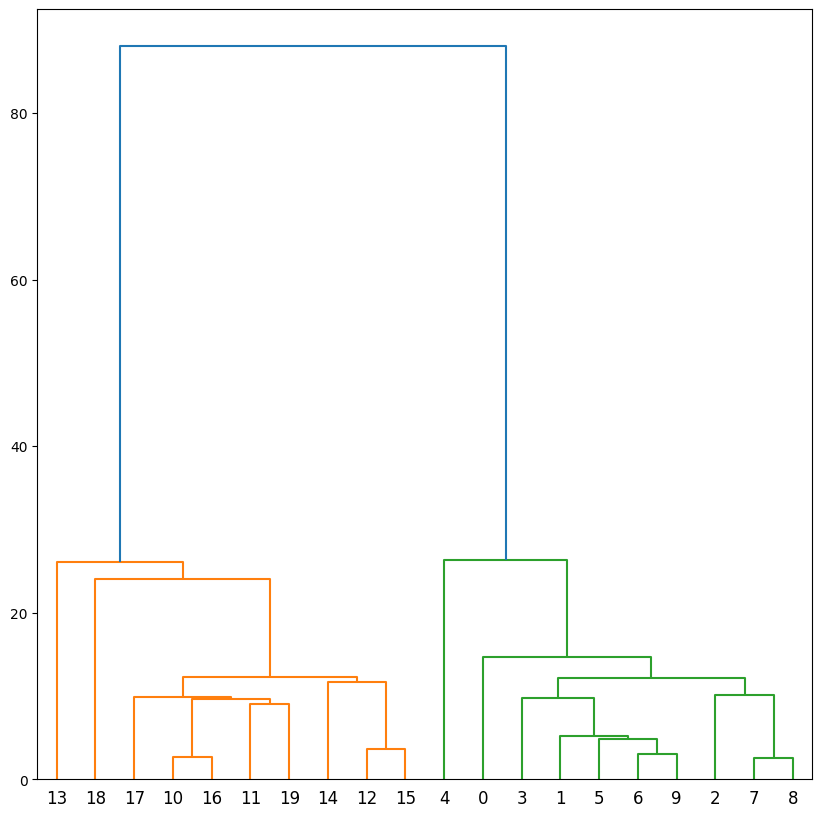

In [61]:
_=dendrogram(lm)

We can "cut" the dendrogram to form flat clusters. If we cut the above diagram into two clusters, we get a good answer.

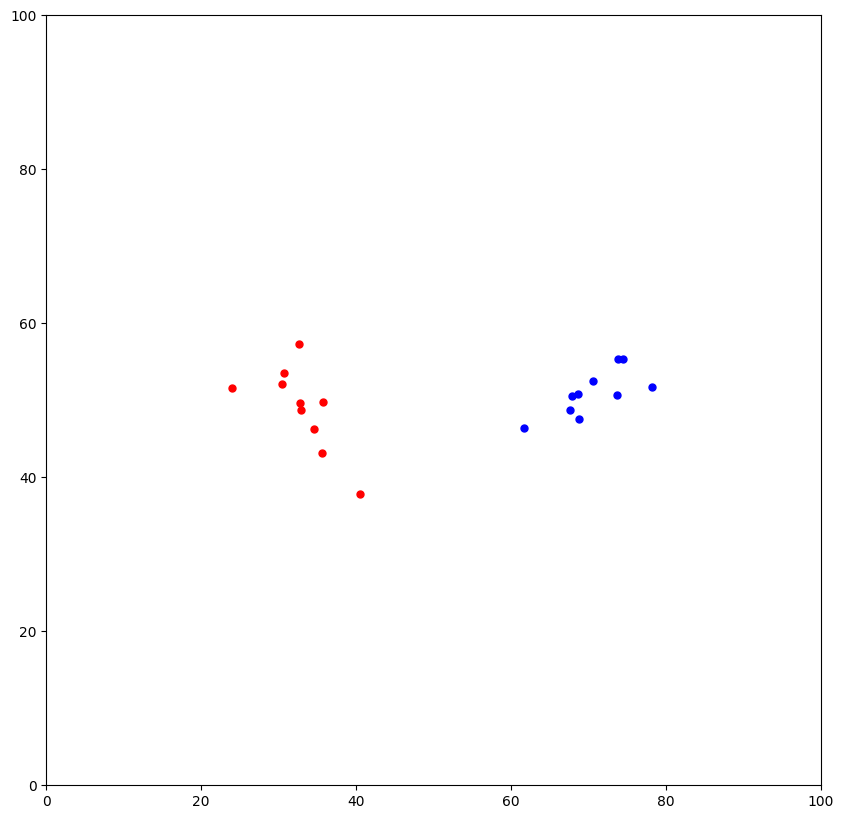

In [62]:
## Plotting the individual clusters
plotclusters(data,fcluster(lm,2,criterion='maxclust'))

As you can see that now the clusters are shown in two different colours. It means that the algorithm has created two separate groupings based on some similarity criteria.

In the lines above, have talked about linkage matrices and we have written in our code _lm = linkage(ds,"**single**")_. So Let’s discuss about the different types of linkages that we generally use.

**Linkage Methods**

In [63]:
# Taking a data for example
data = r_[dot(randn(100,2),diag([4,10]))+array([60,60]),
           dot(randn(100,2),diag([4,10]))+array([40,40])]
shuffle(data)

Initially, hierarchical clustering starts out with clusters consisting of individual points. 

Later, it compares clusters with each other and merges the two "closest" clusters.

Since clusters are sets of points, there are many different kinds of linkage methods:

- Single Linkage: cluster distance = smallest pairwise distance
- Complete Linkage: cluster distance = largest pairwise distance
- Average Linkage: cluster distance = average pairwise distance
- Centroid Linkage: cluster distance=  distance between the centroids of the clusters
- Ward’s Linkage: cluster criteria= Minimize the variance in the cluster


**Single Linkage:** Minimal intercluster dissimilarity. Compute all pairwise dissimilarities between the observations in cluster A and the observations in cluster B, and record the smallest of these dissimilarities. Single linkage can result in extended, trailing clusters in which single observations are fused one-at-a-time.

- cluster distance is the smallest distance between any point in cluster 1 and any point in cluster 2
- highly sensitive to outliers when forming flat clusters
- works well for low-noise data with an unusual structure


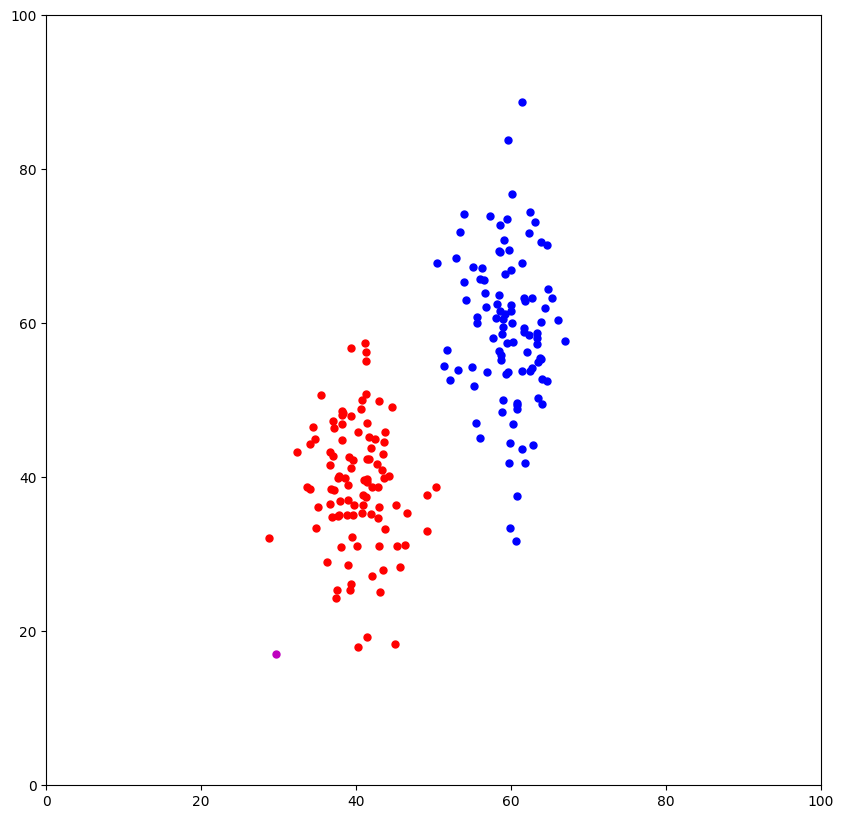

In [65]:
assignment = fclusterdata(data,3,metric='euclidean',method='single',criterion='maxclust')
plotclusters(data,assignment)

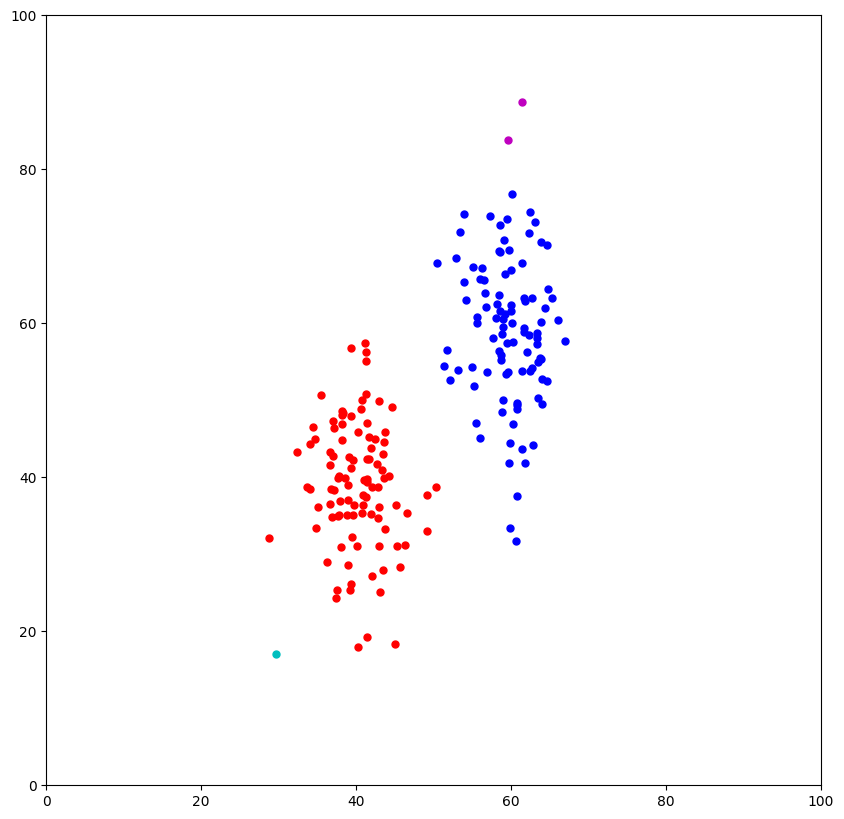

In [66]:
assignment = fclusterdata(data,4,metric='euclidean',method='single',criterion='maxclust')
plotclusters(data,assignment)

**Complete Linkage:** Maximal intercluster dissimilarity. Compute all pairwise dissimilarities between the observations in cluster A and the observations in cluster B, and record the largest of these dissimilarities.

- cluster distance is the largest distance between any point in cluster 1 and any point in cluster 2
- less sensitive to outliers than single linkage


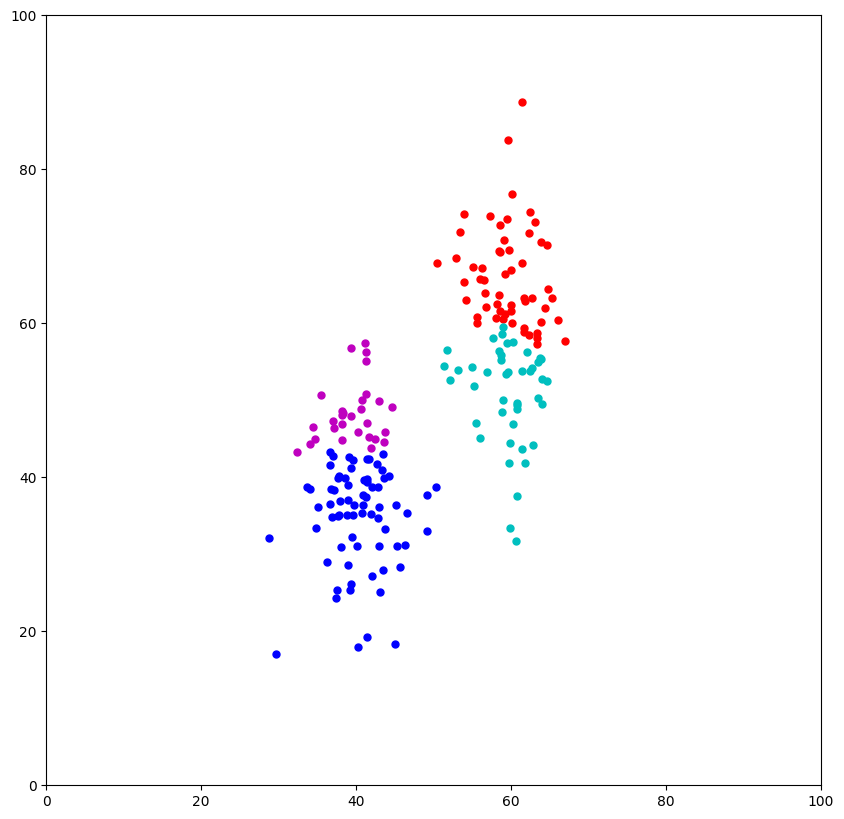

In [69]:
assignment = fclusterdata(data,4,metric='euclidean',method='complete',criterion='maxclust')
plotclusters(data,assignment)

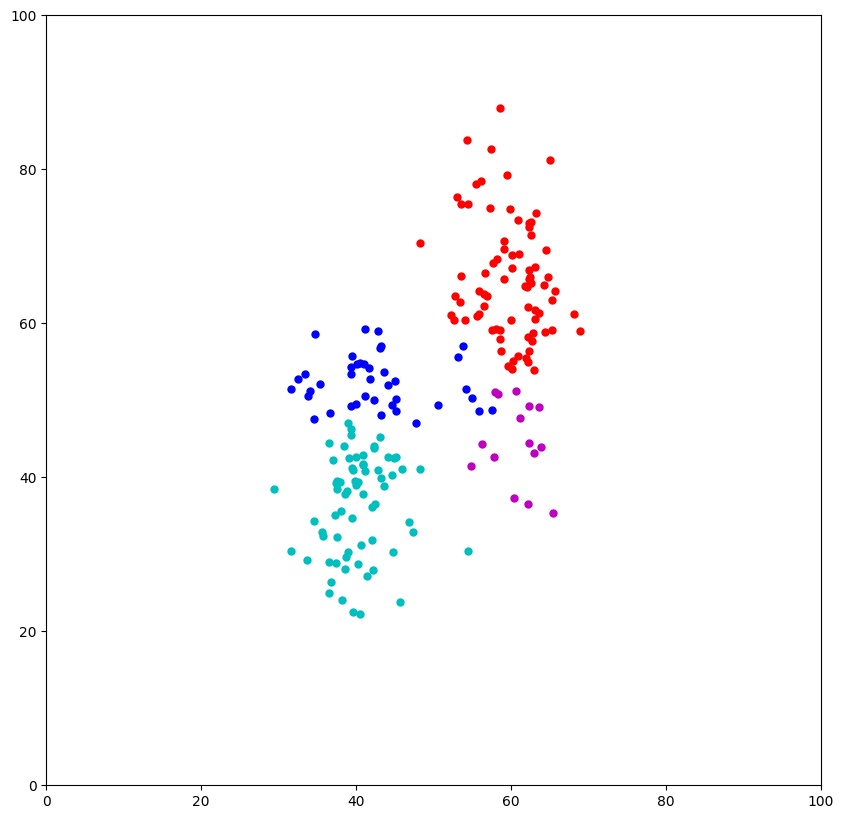

In [36]:
assignment = fclusterdata(data,4,metric='euclidean',method='complete',criterion='maxclust')
plotclusters(data,assignment)

**Average Linkage:** Mean intercluster dissimilarity. Compute all pairwise dissimilarities between the observations in cluster A and the observations in cluster B, and record the average of these dissimilarities.


- cluster distance is the average distance of all pairs of points in clusters 1 and 2


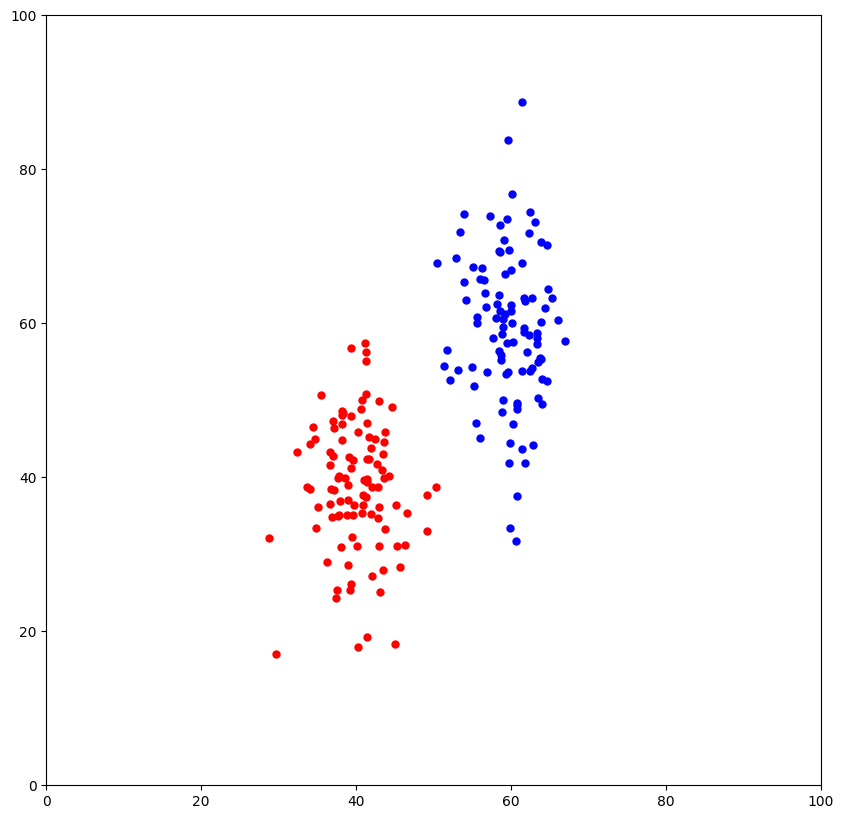

In [70]:
assignment = fclusterdata(data,2,metric='euclidean',method='average',criterion='maxclust')
plotclusters(data,assignment)

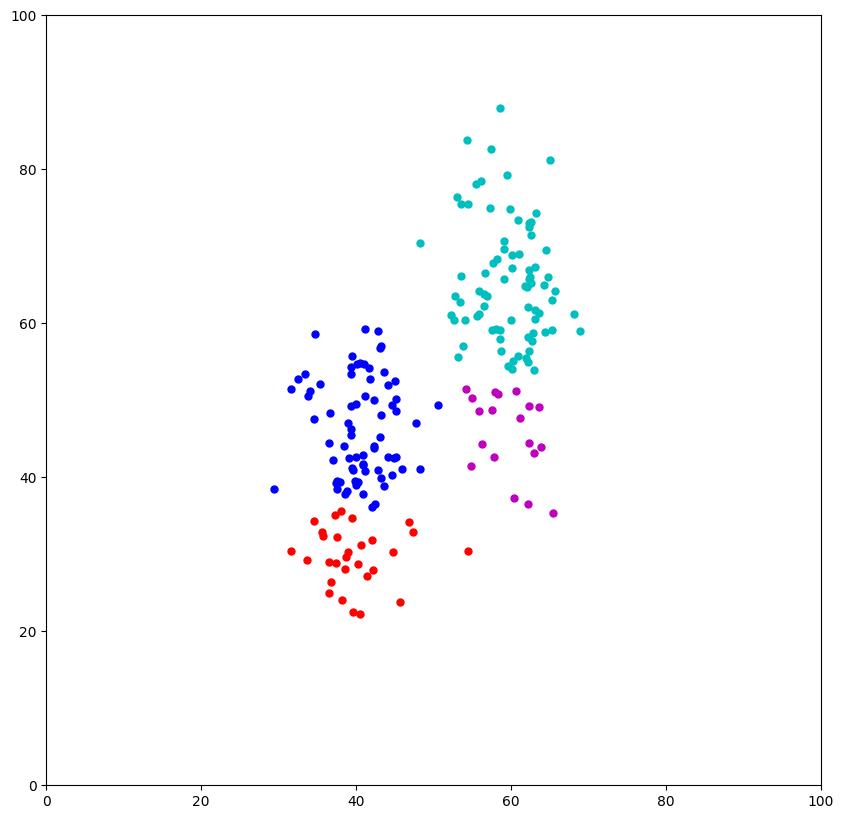

In [38]:
assignment = fclusterdata(data,4,metric='euclidean',method='average',criterion='maxclust')
plotclusters(data,assignment)

**Centroid Linkage:** The dissimilarity between the centroid for cluster A (a mean vector of length p) and the centroid for cluster B. Centroid linkage can result in undesirable inversions.

- cluster distance is the distance of the centroids of both clusters


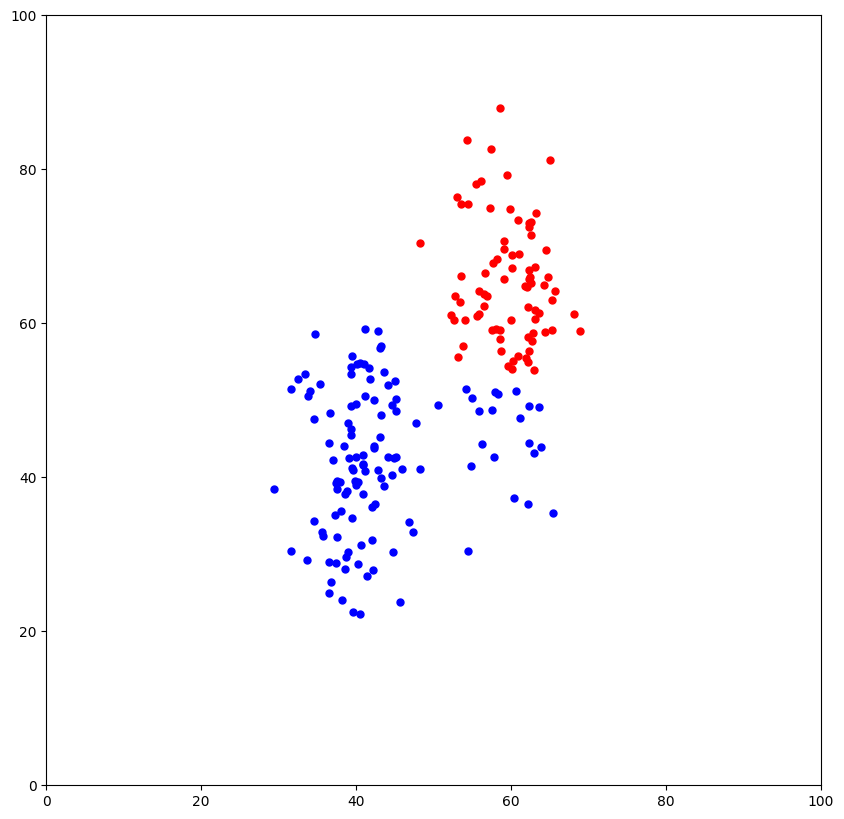

In [39]:
lm = linkage(data,metric='euclidean',method='centroid')
assignment = fcluster(lm,2,criterion='maxclust')
plotclusters(data,assignment)

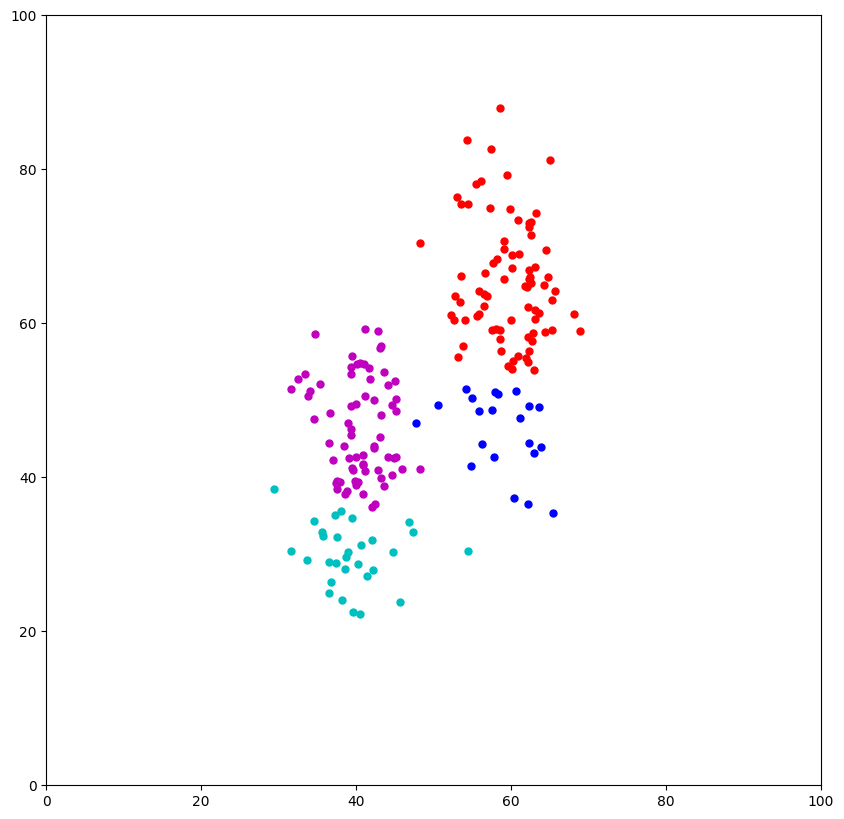

In [40]:
lm = linkage(data,metric='euclidean',method='centroid')
assignment = fcluster(lm,4,criterion='maxclust')
plotclusters(data,assignment)

**Ward linkage:** Wikipidea says _Ward's minimum variance criterion minimizes the total within-cluster variance. To implement this method, at each step find the pair of clusters that leads to minimum increase in total within-cluster variance after merging._

- based on minimizing a variance criterion before and after merging


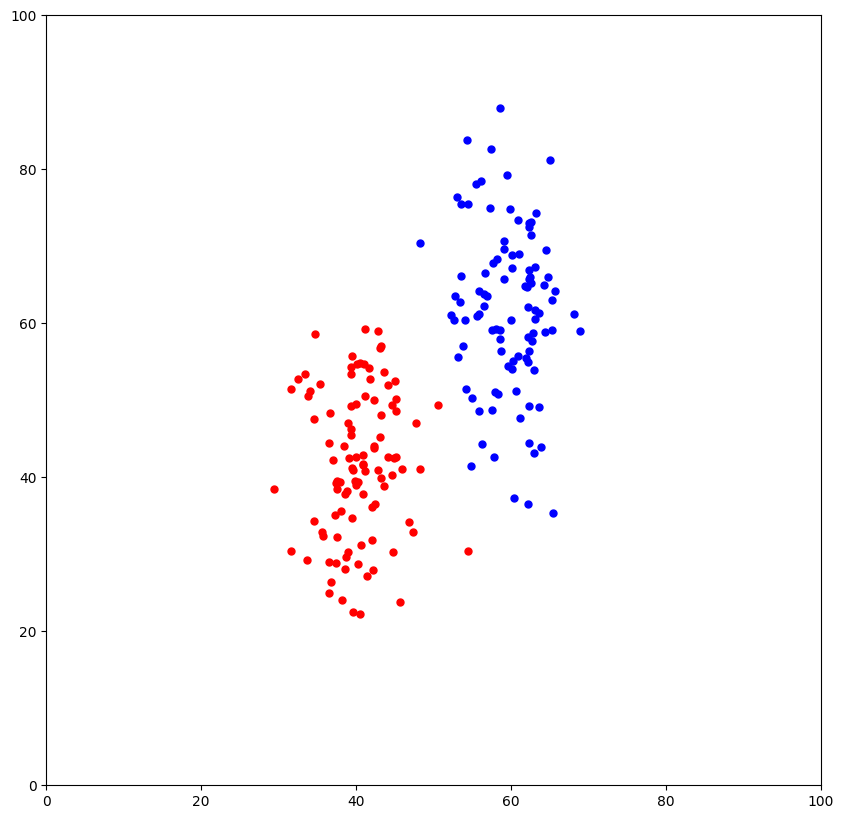

In [41]:
lm = linkage(data,metric='euclidean',method='ward')
assignment = fcluster(lm,2,criterion='maxclust')
plotclusters(data,assignment)

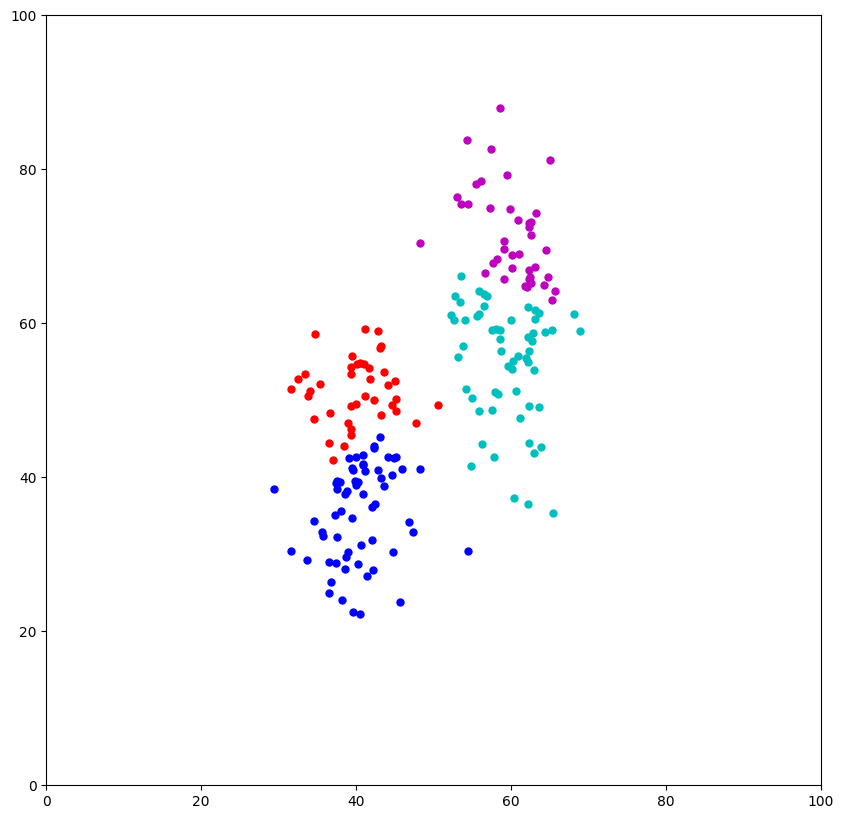

In [42]:
lm = linkage(data,metric='euclidean',method='ward')
assignment = fcluster(lm,4,criterion='maxclust')
plotclusters(data,assignment)

### DBSCAN(Density Based Spatial Clustering of Apllications with Noise)

It is an unsupervised machine learning algorithm.This algorithm defines clusters as continuous regions of high density.

Some definitions first:

**Epsilon:** This is also called eps. This is the distance till which we look for the neighbouring points.

**Min_points:** The minimum number of points specified by the user.

**Core Points:** If the number of points inside the _eps radius_ of a point is greater than or equal to the *min_points* then it’s called a core point.

**Border Points:** If the number of points inside the _eps radius_ of a point is less than the *min_points* and it lies within the _eps radius_ region of a core point, it’s called a border point.

**Noise:** A point which is neither a core nor a border point is a noise point.


Let’s say if the eps=1 and min_points =4

<img src="point_def.PNG" width="400">




Algorithm Steps:

1.	The algorithm starts with a random point in the dataset which has not been visited yet and its neighbouring points are identified based on the eps value.
2.	If the point contains greater than or equal points than the min_pts, then the cluster formation starts and this point becomes a _core point_, else it’s considered as noise. The thing to note here is that a point initially classified as noise can later become a border point if it’s in the eps radius of a core point.
3.	If the point is a core point, then all its neighbours become a part of the cluster. If the points in the neighbourhood turn out to be core points then their neighbours are also part of the cluster.
4.	Repeat the steps above until all points are  classified into different clusters or noises.



This algorithm works well if all the clusters are dense enough, and they are well separated by low-density regions.

##### Python Example

In [43]:
# Necessary Imports

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [44]:
# Data creation
centers = [[1, 1], [-1, -1], [1, -1]]  
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)  # generate sample blobs

X = StandardScaler().fit_transform(X)

In [45]:
# DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)

# we are calculating these for showcasing in diagram
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)  # creating an array of true and false as the same size as db.labels
core_samples_mask[db.core_sample_indices_] = True  # setting the indices of the core regions to True
labels = db.labels_  # similar to the model.fit() method, it gives the labels of the clustered data

In [46]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) # the label -1 is considered as noise by the DBSCAN algorithm
n_noise_ = list(labels).count(-1)  # calculating the number of clusters

In [47]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

"""Homogeneity metric of a cluster labeling given a ground truth.

A clustering result satisfies homogeneity if all of its clusters
contain only data points which are members of a single class."""

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953


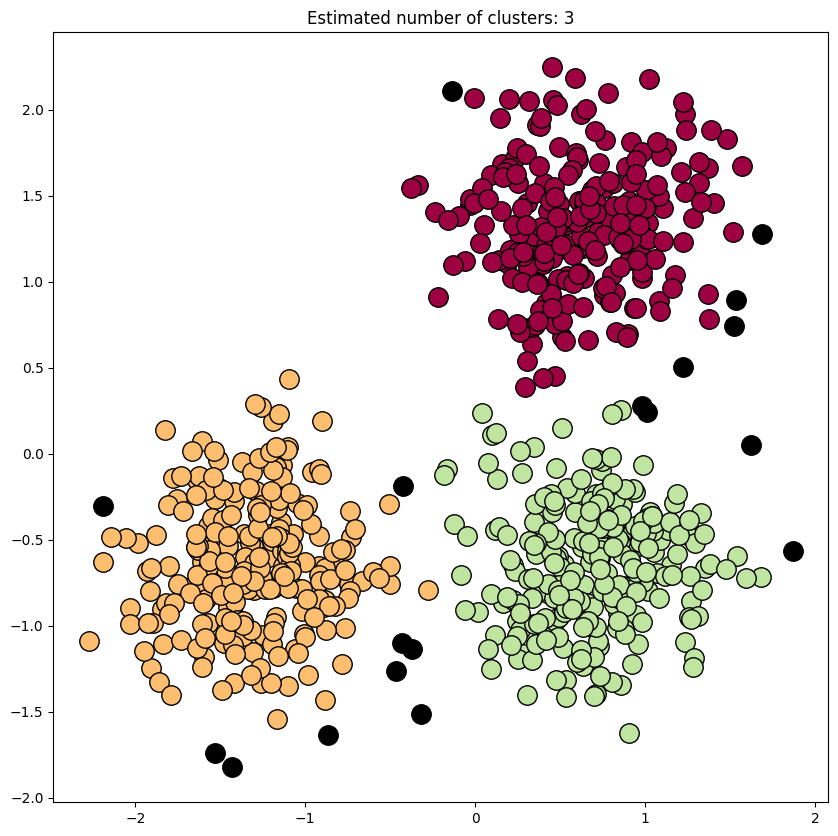

In [48]:
# Plot result
import matplotlib.pyplot as plt

# Black  is used for noise.
unique_labels = set(labels)  # identifying all the unique labels/clusters
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]  # creating the list of colours, generating the colourmap



for k, col in zip(unique_labels, colors):
    
    
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)   # assigning class members for each class
    

    xy = X[class_member_mask & core_samples_mask] # creating the list of points for each class
    
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    

    xy = X[class_member_mask & ~core_samples_mask] # creating the list of noise points
    
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    
    

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In short, DBSCAN is a very simple yet powerful algorithm, capable of identifying any number of clusters, of any shape, it is robust to outliers, and it has just two hyper parameters(eps and min_samples). However, if the density varies significantly across the clusters, it can be impossible for it to capture all the clusters properly. Moreover, its computational complexity is roughly O(m log m), making it pretty close to linear with regards to the number of instances.

## Evaluation of Clustering

**Cluster Validity**

The validation of clusters created is a troublesome task. 
The problem here is: ”clusters are in the eyes of the beholder”

_A good cluster will have:_
* High inter-class similarity, and 
* Low intraclass similarity


##### Aspects of cluster validation

* **External:** Compare your cluster to the ground truth.
* **Internal:** Evaluating the cluster without reference to external data.
* **Reliability:** The clusters are not formed by chance(randomly)- some statistical framework can be used.


##### External Measures:

N: Number of objects in the data
P: ${P_1,P_2,…,P_m}$ the set of ground truth clusters
C: ${C_1,C_2,…C_n}$ the set of clusters formed by the algorithm

The Incidence Matrix:
N* N matrix

$P_ij =1$ if the two points $O_i$ and $O_j$ belong to the same cluster in the ground truth else $P_ij=0$ 

$C_ij =1$ if the two points $O_i$ and $O_j$ belong to the same cluster in the ground truth else $C_ij=0$ 

Now there can be the following scenarios:
1.	$C_ij=P_ij=1$ --> both the points belong to the same cluster for both our algorithm and ground truth(Agree)--- **SS**
2.	$C_ij=P_ij=0$ --> both the points don’t belong to the same cluster for both our algorithm and ground truth(Agree)--- **DD**
3.	$_Cij=1 but P_ij=0$ --> The points belong in the same cluster for our algorithm but in different clusters for the ground truth (Disagree)---- **SD**
4.	$C_ij=0 but P_ij=1$ --> The points don’t belong in the same cluster for our algorithm but in same clusters for the ground truth (Disagree)----**DS**

**Rand Index**= $\frac{Total Agree}{Total Disagree}=\frac{(SS+DD)}{(SS+DD+DS+SD)}$

The disadvantage of this is that it could be dominated by DD.

**Jaccard Coeeficient**=$\frac{ SS}{(SS+SD+DS)}$


In [49]:
print("Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))

Rand Index: 0.952


In [50]:
metrics.jaccard_similarity_score(labels_true, labels)

AttributeError: module 'sklearn.metrics' has no attribute 'jaccard_similarity_score'

A higher value of Rand Index and Jaccard's coefficient mean that the clusters generated by our algorithm mostly agree to the ground truth.

**Confusion matrix:**

$n$= number of points

$m_i$=points in _cluster i_

$c_j$=points in _class j_

$n_{ij}$=  points in cluster i coming from cluster j

$p_{ij}=\frac{n_{ij}}{m_i}$= probability of element from cluster i to be assigned to class j


<img src="conf1.PNG" width= "300">
<img src="prob_conf.PNG" width= "300">


**Entropy** 
Entropy of Cluster i, given by $e_i= - \sum p_{ij} log (p_{ij})$

For the entire clustering algorithm, the entropy can be given as: 
$e= \sum \frac{m_i}{n}e_i$

**Purity**
 The purity is the total percentage of data points clustered correctly.

 The purity of  cluster i, given by $p_i=max (p_{ij})$ 

And for the entire cluster it is: $p(C)=\sum \frac{m_i}{n}p_i$

The Scikit-Learn Package hasen't yet implemented the Purity metrics. Hence, we'll write our custom code to implememt that.

In [ ]:
import numpy as np
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

In [ ]:
purity_score(labels_true, labels)

A high value of purity score means that our clustering algorithm performs well against the ground truth.

So far we have discussed the External Measures. But as it is an unsupervised learning problem, most of the times there is no ground truth to compare to.  Let’s discuss the internal measures.


#### Internal Measures

These are the methods use to measure the quality of clusters without external references. There are two aspects to it.

* **Cohesion:** How closely the objects in the same cluster are related to each other. It is the within-cluster sum of squared distances. It is the same metric that we used to calculate for the K-Means algorithm.
$WCSS= \sum \sum (x-m_i)^2$

* **Separation:** How different the objects in different clusters are and how distinct a well-separated cluster is from other clusters. It is the between cluster sum of squared distances. $BSS=\sum C_i(m-m_i)^2$

Where C is the size of the individual cluster and m is the centroid of all the data points.

**Note:** BSS+WSS is always a constant.

The silhouette  can be calculated as:
<img src="sil2.PNG" width= "300">

Where a(x) is the avarage distance of x from all the other points in the same cluster and b(x) is the avarage distance of x from all the other points in the other clusters.


And the Silhoeutte coefficient is given by:

$SC=\frac{1}{N} \sum S(x)$


In [ ]:
metrics.silhouette_score

<function sklearn.metrics.cluster._unsupervised.silhouette_score(X, labels, *, metric='euclidean', sample_size=None, random_state=None, **kwds)>

A higher silhouette score means that the inter cluster similarity is less and the intra cluster dissimilarity is more which is the measure of good clustering.

### Cloud Deployment (AWS)

Once the training is completed, we need to expose the trained model as an API for the user to consume it. For prediction, the saved model is loaded first and then the predictions are made using it. If the web app works fine, the same app is deployed to the cloud platform. The application flow for cloud deployment looks like:

<img src="testing_pipeline.PNG" width= "300">

##### Pre-requisites:
* Basic knowledge of flask framework.
* Any Python IDE installed(we are using PyCharm).
* A Microsoft Azure account. 
* Basic understanding of HTML.


#### Deployment Steps:

1. Create the project structure, as shown below:
    <img src="folder_structure.PNG" width="300">

3. Go to https://portal.azure.com/ and create an account if already haven’t created one.
4. Go to the Azure account and create a web app.
<img src="web_app.PNG" width="300">

5. Provide the app name, resource group(create new if necessary), runtime stack(Python 3.7), region, select the 1 GB size, which is free to use. Click Review+create to create the web app

<img src="web_app2.PNG" width="300">

6. Once the deployment is completed, open the app and go to the ‘Deployment Center’ option. Select ‘local git’ for source control and click continue

<img src="after_deployment.PNG" width="300">

7. Select the kudo ‘App service build provider’ as the build provider and click continue.

<img src="kudo.PNG" width="300">

8. Click ‘Finish’ to complete the setup.
9. Go to the overview section of the app, and the Git link now will be visible.
<img src="local_git.PNG" width="300">

10. Go to ‘Deployment Credentials’ in deployment center and copy the username and password. These will be required when doing the final push to the remote git repository.
<img src="cred.PNG" width="300">

11. Open a command prompt and navigate to your project folder.
12. Run **git init** to initialise an empty git repository
13. Create a new remote git alias using the command: git remote add <alias> <git clone url>
    
14. Use **git add .** to add all the files to the local git repository.
15. Use **git commit -m "first commit"** to commit the code to the git repo.
16. Push the code to the remote repo using: git push <alias> master –f
    
17. This prompts for a username and password. Provide the same credentials as copied in the step above.
18. After deployment, from the ‘overview’ section, copy the URL and paste into any web API test to see the application running.
<img src="final.PNG" width="300">


References:

Introduction to Statistical Learning

Hands-on Machine Learning with Scikit-Learn

Scikit-Learn Definitions